In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud

In [ ]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("all_kindle_review.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [4]:
possible_review_cols = ["reviewText", "review", "text", "review_body", "content"]

review_col = None
for col in possible_review_cols:
    if col in df.columns:
        review_col = col
        break

review_col

'reviewText'

In [5]:
if review_col is None:
    raise ValueError("No review column detected!")

In [6]:
def clean_text(text):
    if isinstance(text, float):
        text = str(text)

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [7]:
df["cleaned_text"] = df[review_col].astype(str).apply(clean_text)
df[["cleaned_text"]].head()

,cleaned_text
0,jace rankin may be short but hes nothing to me...
1,great short read i didnt want to put it down s...
2,ill start by saying this is the first of four ...
3,aggie is angela lansbury who carries pocketboo...
4,i did not expect this type of book to be in li...


In [8]:
df["orig_length"] = df[review_col].astype(str).apply(len)
df["cleaned_length"] = df["cleaned_text"].apply(len)

df[["orig_length", "cleaned_length"]].head()

,orig_length,cleaned_length
0,2921,2826
1,371,354
2,416,389
3,336,327
4,90,90


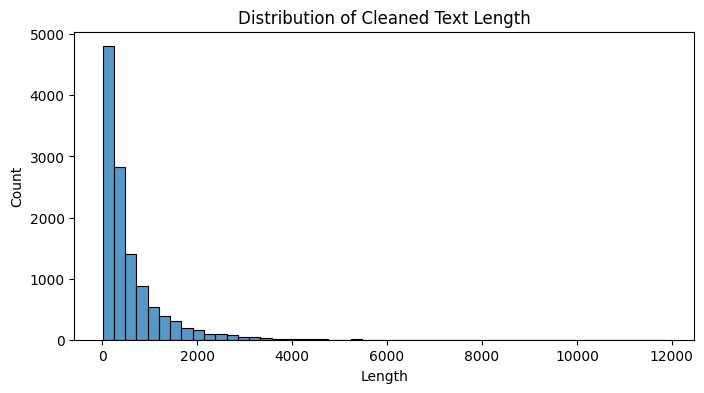

In [9]:
# Distribution Plot
plt.figure(figsize=(8,4))
sns.histplot(df["cleaned_length"], bins=50)
plt.title("Distribution of Cleaned Text Length")
plt.xlabel("Length")
plt.show()

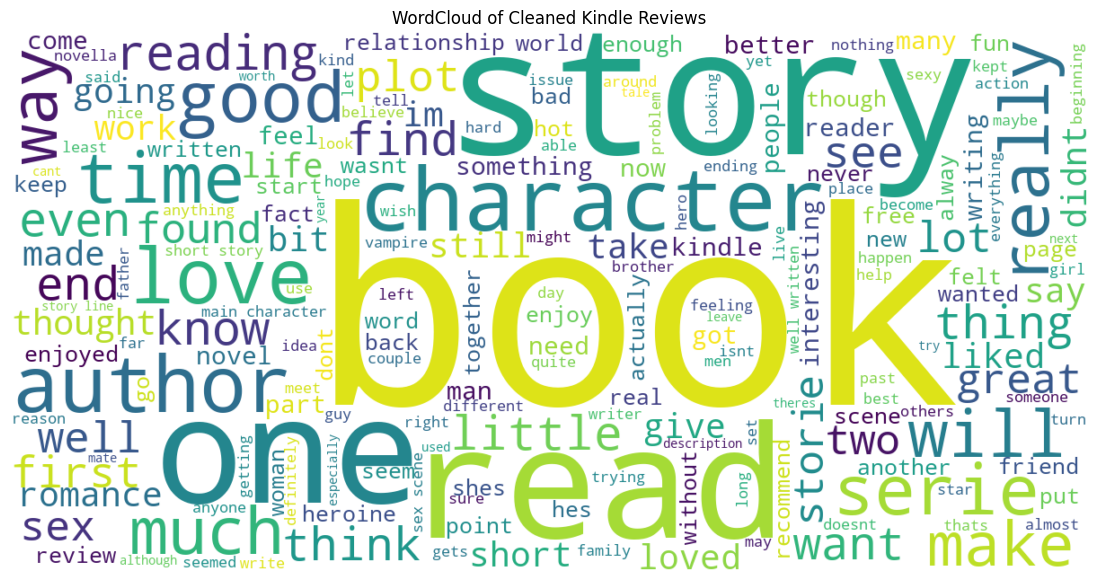

In [10]:
all_text = " ".join(df["cleaned_text"].tolist())

wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Cleaned Kindle Reviews")
plt.show()

In [11]:
possible_rating_cols = ["overall", "rating", "stars", "star_rating", "score"]

rating_col = None
for col in possible_rating_cols:
    if col in df.columns:
        rating_col = col
        break

rating_col

'rating'

In [12]:
# Case 1 — Rating Column Exists
if rating_col:
    df["sentiment"] = df[rating_col].apply(
        lambda x: "positive" if float(x) >= 4 else "negative"
    )

else:
    positive_words = ["good", "great", "excellent", "love", "amazing", "nice"]
    negative_words = ["bad", "poor", "terrible", "worst", "boring", "hate"]

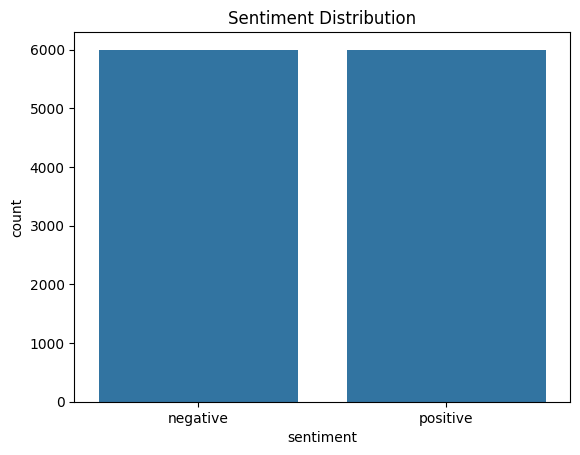

In [13]:
sns.countplot(x=df["sentiment"])
plt.title("Sentiment Distribution")
plt.show()

In [14]:
df.to_csv("cleaned_reviews.csv", index=False)
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned_text,orig_length,cleaned_length,sentiment
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,jace rankin may be short but hes nothing to me...,2921,2826,negative
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,great short read i didnt want to put it down s...,371,354,positive
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,ill start by saying this is the first of four ...,416,389,negative
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,aggie is angela lansbury who carries pocketboo...,336,327,negative
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,i did not expect this type of book to be in li...,90,90,positive
